## Imports

In [1]:
# Required for autocnet imports
import os
os.environ['ISISROOT'] = '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0'

# Autocnet Imports
from autocnet.graph.network import NetworkCandidateGraph

# Helpful Python Modules
import matplotlib.pyplot as plt  #     plotting package
import numpy as np               #     numerical computing package

## Ingestion of network for analysis outside of DB

#### If you just want to explore your network without the benefit of DB queries, you can ingest the network into a pandas DataFrame

In [2]:
from plio.io.io_controlnetwork import from_isis

cnet_path = 'AS15_landingsite_apollolro.net'
cnet_df = from_isis(cnet_path)

In [3]:
# Preview of the Data
cnet_df.head()

,id,pointType,pointChoosername,pointDatetime,pointEditLock,pointIgnore,pointJigsawRejected,referenceIndex,aprioriSurfPointSource,aprioriSurfPointSourceFile,...,measureDatetime,measureEditLock,measureIgnore,measureJigsawRejected,diameter,apriorisample,aprioriline,samplesigma,linesigma,measureLog
0,M102128467LE_bndry_11,2,cnetmerge,2014-03-17T15:07:59,False,False,False,3,0,,...,2014-03-17T15:56:34,False,False,False,0.0,5038.500000,1047.500000,0.0,0.0,"[MinimumPixelZScore: -4.978048566276621, Maxim..."
1,M102128467LE_bndry_11,2,cnetmerge,2014-03-17T15:07:59,False,False,False,3,0,,...,2014-03-17T15:56:34,False,False,False,0.0,202.773371,1198.122737,0.0,0.0,"[MinimumPixelZScore: -4.978048566276621, Maxim..."
2,M102128467LE_bndry_11,2,cnetmerge,2014-03-17T15:07:59,False,False,False,3,0,,...,2014-03-17T15:56:34,False,False,False,0.0,2740.427923,1446.410708,0.0,0.0,"[MinimumPixelZScore: -4.978048566276621, Maxim..."
3,M102128467LE_bndry_11,2,cnetmerge,2014-03-17T15:07:59,False,False,False,3,0,,...,2014-03-17T15:20:12,False,False,False,0.0,3801.934918,378.231158,0.0,0.0,[]
4,M102128467LE_bndry_15,2,cnetmerge,2014-03-17T15:07:59,False,False,False,2,0,,...,2014-03-17T15:56:34,False,False,False,0.0,4992.803228,5091.866958,0.0,0.0,"[MinimumPixelZScore: -1.9724331294777808, Maxi..."


In [4]:
# Exhaustive list of available data columns
cnet_df.columns

Index(['id', 'pointType', 'pointChoosername', 'pointDatetime', 'pointEditLock',
       'pointIgnore', 'pointJigsawRejected', 'referenceIndex',
       'aprioriSurfPointSource', 'aprioriSurfPointSourceFile',
       'aprioriRadiusSource', 'aprioriRadiusSourceFile', 'latitudeConstrained',
       'longitudeConstrained', 'radiusConstrained', 'aprioriX', 'aprioriY',
       'aprioriZ', 'aprioriCovar', 'adjustedX', 'adjustedY', 'adjustedZ',
       'adjustedCovar', 'pointLog', 'serialnumber', 'measureType', 'sample',
       'line', 'sampleResidual', 'lineResidual', 'measureChoosername',
       'measureDatetime', 'measureEditLock', 'measureIgnore',
       'measureJigsawRejected', 'diameter', 'apriorisample', 'aprioriline',
       'samplesigma', 'linesigma', 'measureLog'],
      dtype='object')

In [5]:
cnet_df[["lineResidual","sampleResidual"]].describe()

,lineResidual,sampleResidual
count,4317.000000,4317.000000
mean,0.159546,-0.021763
std,2.269566,0.304197
min,-20.384293,-3.033084
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,20.311191,2.744440


In [6]:
cnet_df.loc[cnet_df["lineResidual"]>1].describe()

,pointType,referenceIndex,aprioriSurfPointSource,aprioriRadiusSource,aprioriX,aprioriY,aprioriZ,adjustedX,adjustedY,adjustedZ,measureType,sample,line,sampleResidual,lineResidual,diameter,apriorisample,aprioriline,samplesigma,linesigma
count,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.000000,51.000000,51.000000,51.000000,51.0,51.0,51.0,51.0,51.0
mean,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,92.187561,25206.507885,-2.493402,18.527865,0.0,-0.5,-0.5,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.808989,14444.251311,0.296123,1.499894,0.0,0.0,0.0,0.0,0.0
min,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.024443,1084.872259,-3.033084,15.802673,0.0,-0.5,-0.5,0.0,0.0
25%,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,79.568154,13697.400779,-2.728367,16.656982,0.0,-0.5,-0.5,0.0,0.0
50%,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,91.566609,24128.745817,-2.484678,19.138409,0.0,-0.5,-0.5,0.0,0.0
75%,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,102.218419,34547.083753,-2.211107,19.700954,0.0,-0.5,-0.5,0.0,0.0
max,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,123.070627,51119.799216,-1.922197,20.311191,0.0,-0.5,-0.5,0.0,0.0


#### Visualize Residuals

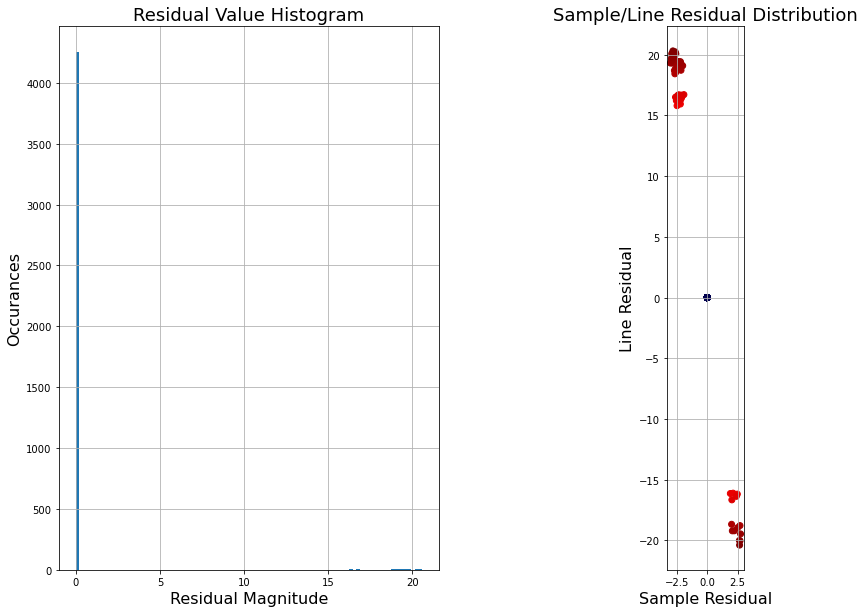

In [7]:
# list comprehension to resolve line/sample residuals
res = [np.linalg.norm((i, j)) for i, j in zip(cnet_df['sampleResidual'].values, cnet_df['lineResidual'].values)]


# Example Plot 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].hist(res, bins=100);
axs[0].grid();
axs[0].set_xlabel('Residual Magnitude', size=16);
axs[0].set_ylabel('Occurances', size=16);
axs[0].set_title('Residual Value Histogram', size=18);

point_color=np.array([0,0,1,0.01])
point_colors=res/np.max(res)
axs[1].scatter(cnet_df['sampleResidual'].values, cnet_df['lineResidual'].values, c=point_colors, cmap="seismic");
axs[1].grid();
axs[1].set_aspect("equal")
axs[1].set_xlabel('Sample Residual', size=16);
axs[1].set_ylabel('Line Residual', size=16);
axs[1].set_title('Sample/Line Residual Distribution', size=18);


## Config

- Configuration files in AutoCNet can run in two ways.  

- The first is as a dictionary.  In dictionary, you can have nested dictionaries (values of dictionaries are other dictionaries).  
- This next cell took the config.yml file, read it in, and converted it to a dictionary.  

- The second way is just to put the file name directly in.

In [8]:
# Config setup option 1
from autocnet.config_parser import parse_config

config_path = 'config.yml'
config = parse_config(config_path)

## Ingest Database

- cnet_path is the path to the control network. 

- lis_path is the path to the image files.  

- Image files need to have footprintinit run on all of them prior to ingestion by autocnet.

In [9]:
cnet_path = "AS15_landingsite_apollolro.net"

lis_path = "AS15_landingsite_apollolro.lis"

- Next cell is the real meat, ingesting the images. 

- This cell paths to the list file, then to the config file, and dumps the contents of the database if it already exists (clear_db=TRUE). 

- This cell also computes another command to find all overlaping regions for the images.  

- This can all be done in parallal to speed up processing time.

In [10]:
ncg = NetworkCandidateGraph.from_filelist(lis_path, config, clear_db=True)

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/autocnet-0.2.6-py3.7.egg/autocnet/graph/network.py:2119: UserWarning: Failed to reset primary id sequence for table costs
  warnings.warn(f'Failed to reset primary id sequence for table {t}')


loading 1 of 11


/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1997: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay should include sync_backref=False set on the Overlay.points relationship.  (this warning may be suppressed after 10 occurrences)
  (rel_b, rel_a, rel_b),
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1997: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points should include sync_backref=False set on the Points.overlay relationship.  (this warning may be suppressed after 10 occurrences)
  (rel_b, rel_a, rel_b),


loading 2 of 11
loading 3 of 11
loading 4 of 11
loading 5 of 11
loading 6 of 11
loading 7 of 11
loading 8 of 11
loading 9 of 11
loading 10 of 11
loading 11 of 11


In [11]:
from autocnet.io.db.model import Images, Points
with ncg.session_scope() as session:
    res = session.query(Images)
    for image in res:
        print(image.serial)

APOLLO15/METRIC/1971-07-31T14:00:53.547
APOLLO15/METRIC/1971-07-31T14:01:16.947
APOLLO15/METRIC/1971-07-31T14:01:40.346
APOLLO15/METRIC/1971-07-31T14:02:03.751
APOLLO15/METRIC/1971-07-31T14:02:27.179
LRO/1/269182000:51104/NACL
LRO/1/269182000:51104/NACR
LRO/1/269189158:41274/NACL
LRO/1/269189158:41274/NACR
LRO/1/269196317:57658/NACL
LRO/1/269196317:57658/NACR


- This cell just checks that there are images in the database, it should spit out serial numbers.

In [12]:
# Quick Check there are images in the DB
from autocnet.io.db.model import Images, Points
with ncg.session_scope() as session:
    res = session.query(Images).count()
    print(res)

11


- At this point, it is worth checking autocnet to make sure the images have loaded correctly.

- Go to: autocnet.wr.usgs.gov  (pg admin). In pg admin, go to your database/schemas/tables/images and right-click images.  Select the query tool.  

- Write some simple code to get everything for the image table (select * from images) and press the lightning bolt button.  

- Click the eyeball next to the geom column and it should show the image footprints.

- The next cell is to injest the control points for the images.  

- There will be some warnings that can be ignored for now.  This block takes about ~10 minutes to run.

In [13]:
ncg = NetworkCandidateGraph.from_cnet(cnet_path, lis_path, config)

loading 1 of 11
loading 2 of 11
loading 3 of 11
loading 4 of 11
loading 5 of 11
loading 6 of 11
loading 7 of 11
loading 8 of 11
loading 9 of 11
loading 10 of 11
loading 11 of 11


/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/env

/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,
/work/users/bhwheeler/miniconda3/envs/autocnet/lib/python3.7/site-packages/pyproj/transformer.py:437: UserWarning: radian input with pipelines is not supported in pyproj 2. support for raidans will be added in pyproj 3.
  errcheck=errcheck,


In [14]:
from autocnet.io.db.model import Images, Points
with ncg.session_scope() as session:
    res = session.query(Points).all()
    print(len(res))
    for i in range(0,11):
        print(f'point {res[i].id} geom: ', res[i].geom)

1520
point 1 geom:  POINT (0 90)
point 2 geom:  POINT (0 90)
point 3 geom:  POINT (0 90)
point 4 geom:  POINT (0 90)
point 5 geom:  POINT (0 90)
point 6 geom:  POINT (0 90)
point 7 geom:  POINT (0 90)
point 8 geom:  POINT (0 90)
point 9 geom:  POINT (0 90)
point 10 geom:  POINT (0 90)
point 11 geom:  POINT (0 90)
